In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('..')

In [2]:
from indra.common import Circle
from indra.mobius import MobiusTransformation as Mobius

In [26]:
# some example transformations
s, t = 0.1, 0.9

a = Mobius(s+t, -2*s*t, -2, s+t)
A = a.inv()
b = Mobius(s+t, 2, 2*s*t, s+t)
B = b.inv()

gens = [a, b, A, B]
inv = [2, 3, 0, 1]

In [27]:
# circles paired by these transformations
r1 = (t - s) / 2
r2 = (1/s - 1/t) / 2

C_a = Circle(complex(s + r1, 0), r1)
C_A = Circle(complex(-s - r1, 0), r1)
C_b = Circle(complex(1/t + r2, 0), r2)
C_B = Circle(complex(-1/t - r2, 0), r2)

circ = [C_a, C_b, C_A, C_B]
tags = ['r', 'y', 'b', 'g']

In [28]:
def plot_circle(C, ax, color='k', fill=True):
    circ = plt.Circle((C.center.real, C.center.imag), C.radius, color=color, fill=fill)
    ax.add_artist(circ)

In [29]:
# Enumerate words with breadth-first search
def bfs(gens, inv, tags, max_level=5):
    current = list(zip(gens, tags))
    for l in range(max_level+1):
        next_level = []
        for seed, tag in current:
            yield seed, tag
            for i in range(len(gens)):
                if i == inv[tags.index(tag)]:
                    continue
                next_level.append((seed(gens[i]), tags[i]))
        current = next_level

<IPython.core.display.Javascript object>


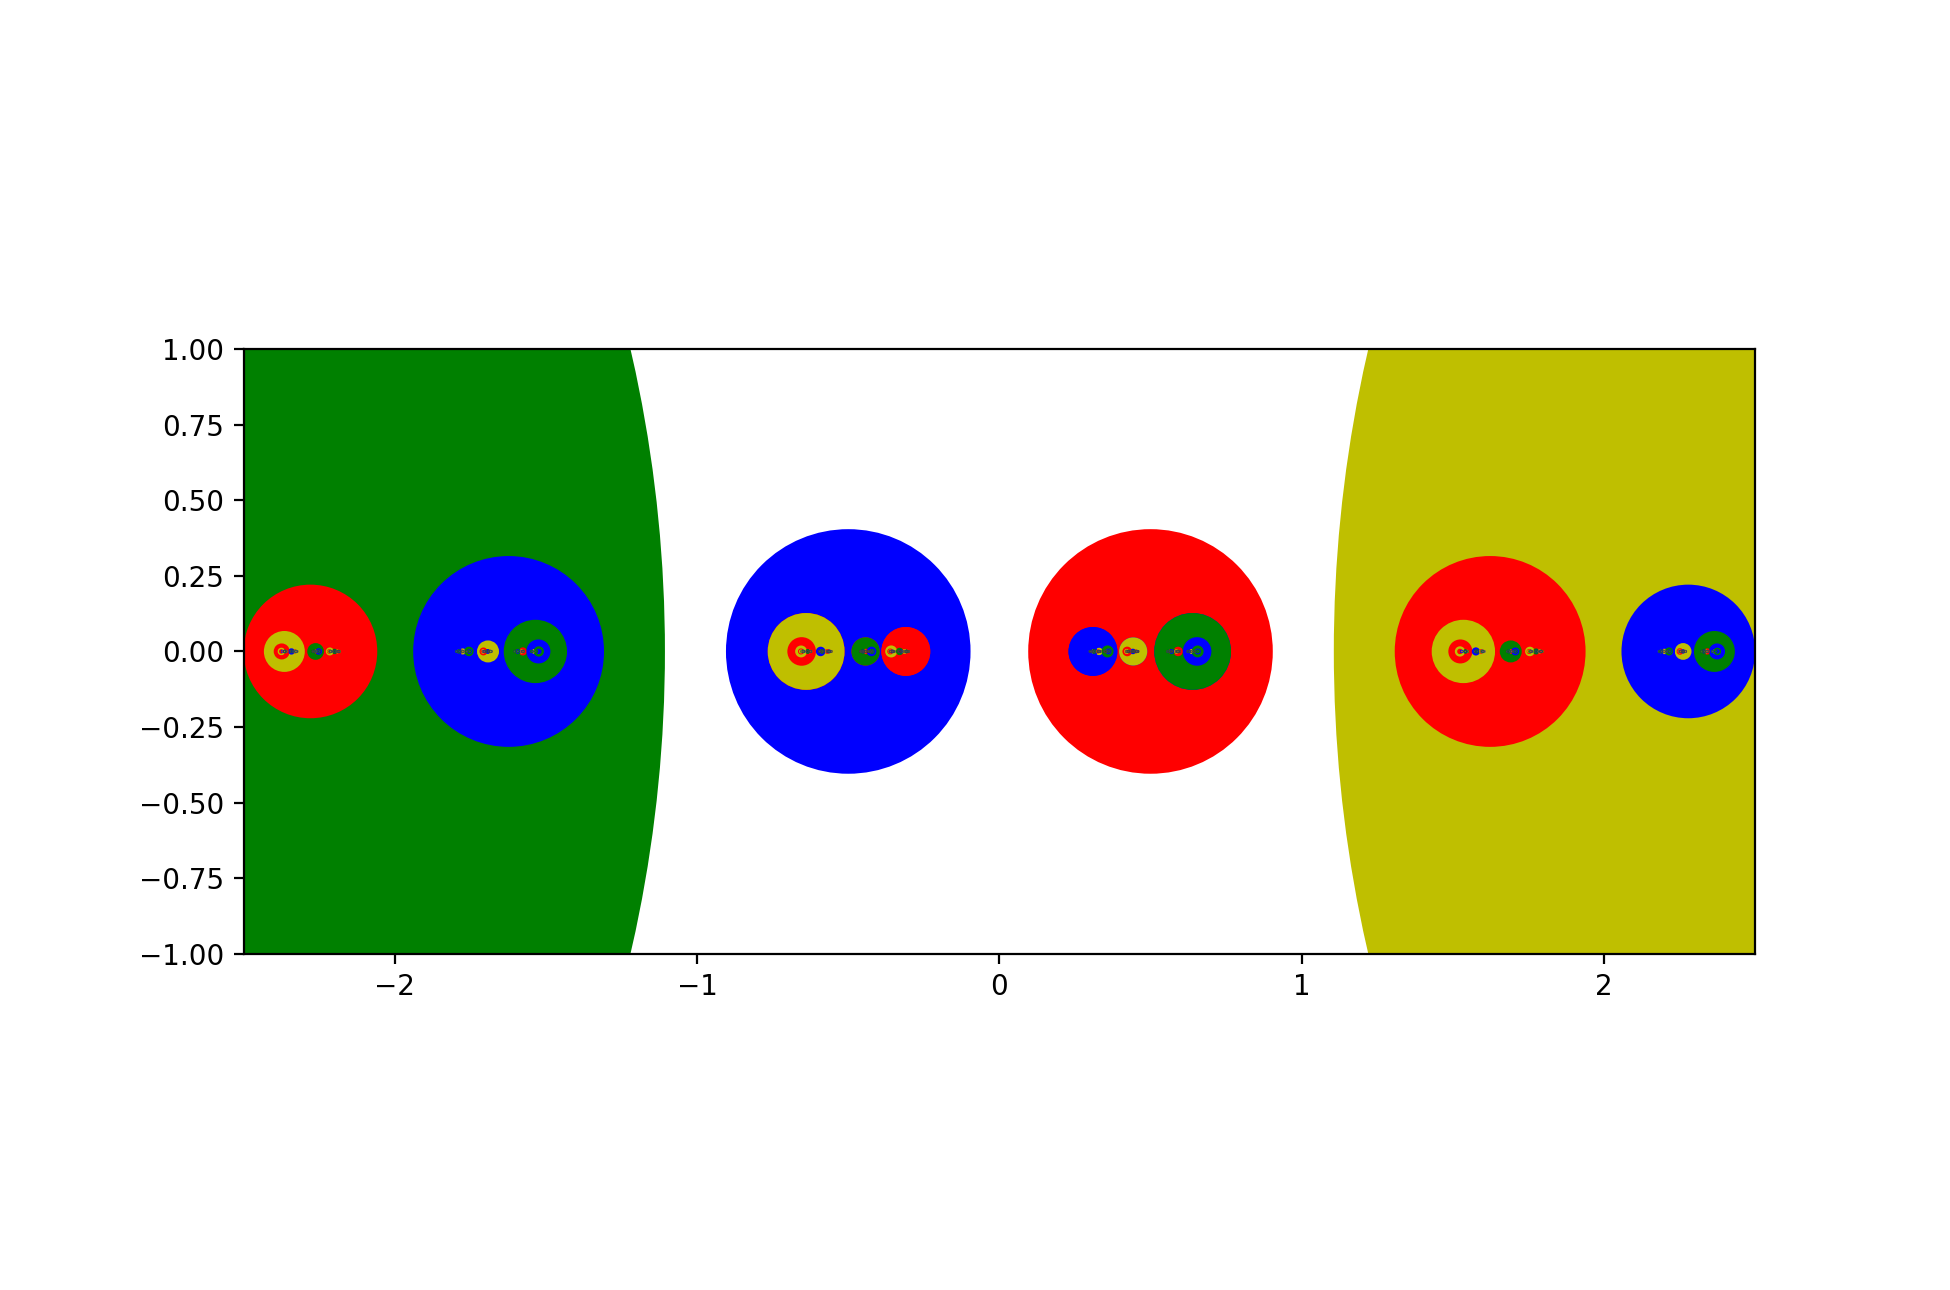

In [30]:
# Set up figure
fig = plt.figure()#figsize=(10, 10))
ax = fig.add_subplot(111, aspect='equal')
ax.set_xlim((-2.5, 2.5))
ax.set_ylim((-1, 1))

# seed circles
for C, color in zip(circ, tags):
    plot_circle(C, ax, color=color)
    
# test first step
for T, color in bfs(gens, inv, tags):
    new_circs = [T(C) for C in circ]
    for C in new_circs:
        plot_circle(C, ax, color=color)